In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

Using TensorFlow backend.


In [2]:
#look cifar10 data
# print('train:',len(x_img_train))
# print('test:',len(x_img_test))
print(x_img_train.shape)
# print(x_img_test[0])
print(y_label_train.shape)

label_dict={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 
            5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


(50000, 32, 32, 3)
(50000, 1)


In [3]:
#look lots image function
def plot_images_labels_prediction(images, labels, prediction, idx, num=25):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

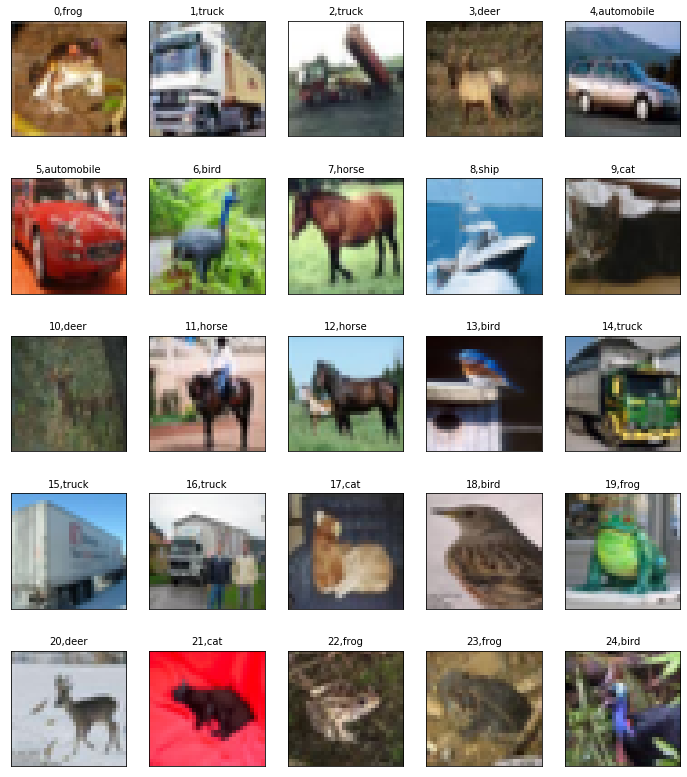

In [4]:
#look train image
plot_images_labels_prediction(x_img_train, y_label_train,[],0)

In [5]:
#normalize
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0
print(x_img_train_normalize[0][0][0])

#onehot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

[0.23137255 0.24313726 0.24705882]


In [6]:
#setting NN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
#conv1
model.add(Conv2D(filters=16,kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
#pooling1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
#pooling2
model.add(MaxPooling2D(pool_size=(2,2)))
#conv3
model.add(Conv2D(filters=64,kernel_size=(5,5),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
#pooling3
model.add(MaxPooling2D(pool_size=(2,2)))
#平坦層
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(1500,activation='relu',))
model.add(Dropout(rate=0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
______________________________________

In [8]:
#training
#載入model 由於一次訓練幾乎就OK了 若是載入上次訓練的權重再繼續訓練圖形看起來很容易被認為overfitting 所以沒使用載入
# try:
#     model.load_weights("cifarModel.h5")
#     print("載入上次訓練model權重")
# except:
#     print("沒有model可以載入，訓練新model")

model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=100, batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 85us/step - loss: 1.2711 - accuracy: 0.5426 - val_loss: 1.3344 - val_accuracy: 0.5575
Epoch 2/100
40000/40000 [==============================] - 3s 77us/step - loss: 1.1560 - accuracy: 0.5885 - val_loss: 1.3036 - val_accuracy: 0.5704
Epoch 3/100
40000/40000 [==============================] - 3s 78us/step - loss: 1.0610 - accuracy: 0.6210 - val_loss: 1.2203 - val_accuracy: 0.5827
Epoch 4/100
40000/40000 [==============================] - 3s 78us/step - loss: 0.9984 - accuracy: 0.6490 - val_loss: 1.1605 - val_accuracy: 0.6165
Epoch 5/100
40000/40000 [==============================] - 3s 79us/step - loss: 0.9493 - accuracy: 0.6607 - val_loss: 1.0982 - val_accuracy: 0.6532
Epoch 6/100
40000/40000 [==============================] - 3s 79us/step - loss: 0.8971 - accuracy: 0.6830 - val_loss: 1.1726 - val_accuracy: 0.6076
Epoch 7/100
40000/40000 [==============================] - 3s 

Epoch 56/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.3150 - accuracy: 0.8904 - val_loss: 0.8228 - val_accuracy: 0.7222
Epoch 57/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.3083 - accuracy: 0.8916 - val_loss: 0.7618 - val_accuracy: 0.7400
Epoch 58/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.3095 - accuracy: 0.8918 - val_loss: 0.8507 - val_accuracy: 0.7140
Epoch 59/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.3195 - accuracy: 0.8899 - val_loss: 0.7770 - val_accuracy: 0.7412
Epoch 60/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.2980 - accuracy: 0.8962 - val_loss: 0.8557 - val_accuracy: 0.7064
Epoch 61/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.3067 - accuracy: 0.8915 - val_loss: 0.8336 - val_accuracy: 0.7226
Epoch 62/100
40000/40000 [==============================] - 3s 78us/step - loss: 0.2930 - accuracy: 0.8999

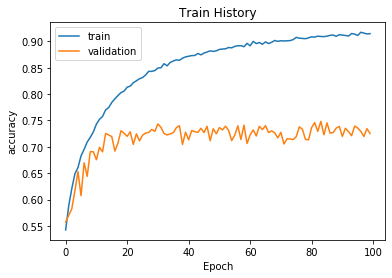

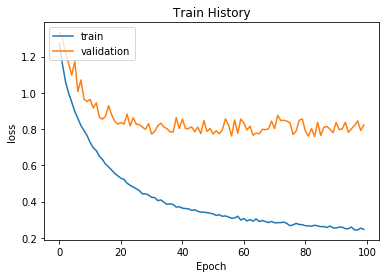

In [9]:
#訓練轉換成圖形顯示
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')



In [10]:
#test
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot, verbose=0)
print("test:")
for x,y in zip(scores, model.metrics_names):
    print(y+":"+str(x))
    


test:
loss:0.8266222736358643
accuracy:0.7206000089645386


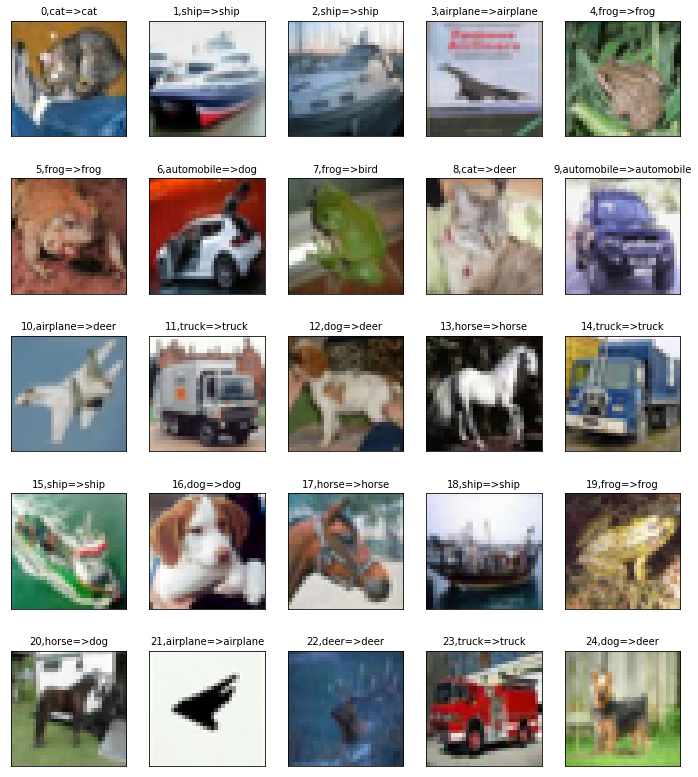

In [14]:
prediction = model.predict_classes(x_img_test_normalize)
plot_images_labels_prediction(x_img_test, y_label_test,prediction,0,25)

label: cat predict: cat


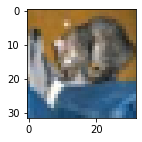

airplane Probability:0.002447254
automobile Probability:0.001292145
bird Probability:0.002887076
cat Probability:0.565487444
deer Probability:0.015176102
dog Probability:0.368240595
frog Probability:0.039013673
horse Probability:0.004726915
ship Probability:0.000330564
truck Probability:0.000398198
label: ship predict: ship


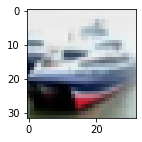

airplane Probability:0.028483720
automobile Probability:0.048850466
bird Probability:0.000261839
cat Probability:0.003084601
deer Probability:0.000124726
dog Probability:0.000914898
frog Probability:0.001080825
horse Probability:0.000471255
ship Probability:0.909157813
truck Probability:0.007569944
label: ship predict: ship


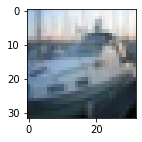

airplane Probability:0.016965045
automobile Probability:0.004093453
bird Probability:0.001793229
cat Probability:0.031327795
deer Probability:0.037904341
dog Probability:0.004196839
frog Probability:0.005574161
horse Probability:0.001757403
ship Probability:0.884707987
truck Probability:0.011679793
label: airplane predict: airplane


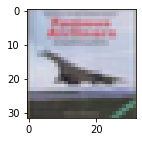

airplane Probability:0.708509803
automobile Probability:0.001433068
bird Probability:0.018666068
cat Probability:0.002012606
deer Probability:0.056179326
dog Probability:0.002020815
frog Probability:0.002298436
horse Probability:0.001581869
ship Probability:0.197558835
truck Probability:0.009739195
label: frog predict: frog


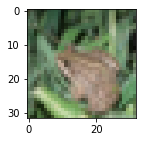

airplane Probability:0.000000014
automobile Probability:0.000000645
bird Probability:0.003573510
cat Probability:0.022108946
deer Probability:0.212059543
dog Probability:0.000079483
frog Probability:0.762171149
horse Probability:0.000005630
ship Probability:0.000000768
truck Probability:0.000000291


In [15]:
#查看單獨圖片預測結果
Predicted_Probability = model.predict(x_img_test_normalize)
def show_predicted_probablity(y, prediction, x_img, Predicted_Probability, i):
    print('label:',label_dict[y[i][0]],
          'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))
for i in range(5):
    show_predicted_probablity(y_label_test,prediction,
                           x_img_test,Predicted_Probability,i)



In [16]:
#confusion matrix
y_label_test.reshape(-1)
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,720,9,44,15,51,7,31,4,104,15
1,15,809,12,8,14,9,33,5,33,62
2,46,1,573,34,172,41,110,7,14,2
3,7,2,56,444,160,134,163,17,8,9
4,7,0,34,22,841,7,67,15,5,2
5,8,1,34,135,150,551,82,34,3,2
6,0,2,12,12,38,9,925,0,2,0
7,12,0,14,35,155,35,28,714,2,5
8,33,15,14,20,25,4,24,2,849,14


In [17]:
model.save_weights("cifarModel.h5")
print("save model")

save model
